In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from NeuralNetwork import Neural_Network
from NeuralNetwork import Neural_Network_Biases

In [2]:
def encode_labels(labels):
    # encode 'Adelie' as 1, 'Chinstrap' as 2, 'Gentoo' as 3
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    # don't worry about this
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

    # encode 1 as [1, 0, 0], 2 as [0, 1, 0], and 3 as [0, 0, 1] (to fit with our network outputs!)
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    return label_encoder, integer_encoded, onehot_encoder, onehot_encoded

Note: The skeleton code was indeed used

First instance has label [1. 0. 0.], which is [0] as an integer, and [1. 0. 0.] as a list of outputs.

[1]
Predicted label for the first instance is: ['Chinstrap']

epoch =  1
Hidden Layer Outputs:  [0.47745456 0.54346686]
Outer Layer Outputs:  [0.47627172 0.52123081 0.47617241]
Output betas:  [0.5237282814572664, -0.5212308085921598, -0.47617240962812674]
Hidden betas:  [-0.06672924754636449, 0.03629970824107195]
Hidden layer weights 
 [[-0.28052064 -0.21971835]
 [ 0.07839682  0.20086728]
 [-0.30115025  0.32062226]
 [ 0.09937879  0.01033606]]
Output layer weights  
 [[-0.27752534  0.01757923  0.19865828]
 [ 0.0941994   0.11586195 -0.37290981]]
acc =  0.0
Predictions are: [array([0.47627172, 0.52123081, 0.47617241])]
Weights after performing BP for first instance only:
Hidden layer weights:
 [[-0.28052064 -0.21971835]
 [ 0.07839682  0.20086728]
 [-0.30115025  0.32062226]
 [ 0.09937879  0.01033606]]
Output layer weights:
 [[-0.27752534  0.01757923  0.19865828]
 [ 0.0941994   0.11586195 

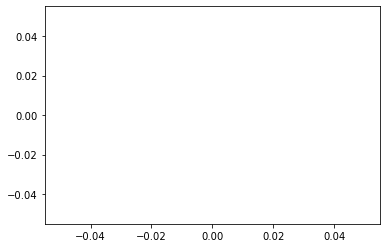

In [3]:
if __name__ == '__main__':
    data = pd.read_csv('penguins307-train.csv')
#     the class label is last!
    labels = data.iloc[:, -1]
#     seperate the data from the labels
    instances = data.iloc[:, :-1]
#     scale features to [0,1] to improve training
    scaler = MinMaxScaler()
    instances = scaler.fit_transform(instances)
    # We can't use strings as labels directly in the network, so need to do some transformations
    label_encoder, integer_encoded, onehot_encoder, onehot_encoded = encode_labels(labels)
    labels = onehot_encoded

    # Parameters. As per the handout.
    n_in = 4
    n_hidden = 2
    n_out = 3
    learning_rate = 0.2

    initial_hidden_layer_weights = np.array([[-0.28, -0.22], [0.08, 0.20], [-0.30, 0.32], [0.10, 0.01]])
    initial_output_layer_weights = np.array([[-0.29, 0.03, 0.21], [0.08, 0.13, -0.36]])
    
    nn = Neural_Network(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,
                        learning_rate)

    print('First instance has label {}, which is {} as an integer, and {} as a list of outputs.\n'.format(
        labels[0], integer_encoded[0], onehot_encoded[0]))
    
    # need to wrap it into a 2D array
    instance1_prediction = nn.predict(np.array([instances[0]]))
    print(instance1_prediction)
    if instance1_prediction[0] is None:
        # This should never happen once you have implemented the feedforward.
        instance1_predicted_label = "???"
    else:
        instance1_predicted_label = label_encoder.inverse_transform(instance1_prediction)
    print('Predicted label for the first instance is: {}\n'.format(instance1_predicted_label))

#     TODO: Perform a single backpropagation pass using the first instance only. (In other words, train with 1
#      instance for 1 epoch!). Hint: you will need to first get the weights from a forward pass.
    nn.train([instances[0]], labels, 1, p=True)
    
    print('Weights after performing BP for first instance only:')
    print('Hidden layer weights:\n', nn.hidden_layer_weights)
    print('Output layer weights:\n', nn.output_layer_weights)
    

epoch =  1
Hidden layer weights 
 [[-0.26440306 -0.38467316]
 [ 0.19216309  0.48902139]
 [-0.17894691  0.14783072]
 [ 0.22918691 -0.11825395]]
Output layer weights  
 [[-0.97039971 -0.51211729 -0.11457374]
 [-0.66679548 -0.61024719 -0.65377477]]
acc =  51.865671641791046
epoch =  2
Hidden layer weights 
 [[-0.25545042 -0.61744868]
 [ 0.20387929  0.65284432]
 [-0.0593835  -0.09853366]
 [ 0.34695735 -0.32367759]]
Output layer weights  
 [[-1.18811802 -0.66642814 -0.15335168]
 [-0.594241   -0.88158613 -0.83067627]]
acc =  48.88059701492538
epoch =  3
Hidden layer weights 
 [[-0.2033484  -0.94862143]
 [ 0.15214082  0.80726878]
 [ 0.12600804 -0.47649687]
 [ 0.51870853 -0.64779856]]
Output layer weights  
 [[-1.44475032 -0.72857894 -0.06171031]
 [-0.1758035  -1.0782009  -1.11986525]]
acc =  50.0
epoch =  4
Hidden layer weights 
 [[-0.10450687 -1.29038969]
 [-0.00598173  1.11666743]
 [ 0.39462478 -0.89255152]
 [ 0.75698861 -0.99047631]]
Output layer weights  
 [[-1.77325304 -0.76068703  0.128

acc =  79.47761194029852
epoch =  32
Hidden layer weights 
 [[ 0.69578604 -6.05181802]
 [-4.89655526  4.28452851]
 [ 1.86741592 -1.77810442]
 [ 1.72232049 -0.33888162]]
Output layer weights  
 [[-6.18914983 -1.92938883  2.78352801]
 [ 4.14688056 -1.87640769 -7.76729863]]
acc =  79.47761194029852
epoch =  33
Hidden layer weights 
 [[ 0.69669982 -6.15895593]
 [-4.97237043  4.29765532]
 [ 1.88150131 -1.7640571 ]
 [ 1.73822805 -0.2903223 ]]
Output layer weights  
 [[-6.2663503  -1.95279469  2.80034516]
 [ 4.1703905  -1.91484446 -7.86034261]]
acc =  79.47761194029852
epoch =  34
Hidden layer weights 
 [[ 0.69760179 -6.2630715 ]
 [-5.04568356  4.31082018]
 [ 1.89556684 -1.75008398]
 [ 1.75436831 -0.24252987]]
Output layer weights  
 [[-6.34195095 -1.97507712  2.81663235]
 [ 4.19304914 -1.95177254 -7.95111   ]]
acc =  79.47761194029852
epoch =  35
Hidden layer weights 
 [[ 0.69851982 -6.3642924 ]
 [-5.11660465  4.32402757]
 [ 1.90956927 -1.73622777]
 [ 1.77066931 -0.19553096]]
Output layer we

 [[ 0.75640599 -8.32983063]
 [-6.41595098  4.69250335]
 [ 2.20888394 -1.46948201]
 [ 2.16416482  0.76460644]]
Output layer weights  
 [[-8.03237146 -2.31117229  3.11148486]
 [ 4.61519987 -2.57501212 -9.89500026]]
acc =  79.8507462686567
epoch =  63
Hidden layer weights 
 [[ 0.7598419  -8.38261716]
 [-6.44869799  4.70634596]
 [ 2.21673725 -1.4640129 ]
 [ 2.17575248  0.7900661 ]]
Output layer weights  
 [[-8.08245744 -2.31723609  3.11776281]
 [ 4.62561616 -2.58792116 -9.95024061]]
acc =  79.8507462686567
epoch =  64
Hidden layer weights 
 [[ 0.76335763 -8.43439201]
 [-6.48070497  4.7201853 ]
 [ 2.22438265 -1.45882233]
 [ 2.18711885  0.8149455 ]]
Output layer weights  
 [[ -8.13205003  -2.32307904   3.12382865]
 [  4.63583126  -2.60042953 -10.00481461]]
acc =  80.22388059701493
epoch =  65
Hidden layer weights 
 [[ 0.76695181 -8.48518525]
 [-6.51199653  4.73401962]
 [ 2.23182371 -1.45390377]
 [ 2.19826617  0.83925963]]
Output layer weights  
 [[ -8.18116327  -2.32871195   3.1296886 ]
 [  

acc =  82.08955223880598
epoch =  94
Hidden layer weights 
 [[ 0.90006773 -9.63221047]
 [-7.18817246  5.12615994]
 [ 2.37344854 -1.40199002]
 [ 2.43791452  1.35552324]]
Output layer weights  
 [[ -9.44365502  -2.43212482   3.23209287]
 [  4.8734944   -2.84481541 -11.40893585]]
acc =  82.08955223880598
epoch =  95
Hidden layer weights 
 [[ 0.90549298 -9.66312622]
 [-7.20551662  5.13917494]
 [ 2.37622175 -1.40250406]
 [ 2.44369601  1.36841368]]
Output layer weights  
 [[ -9.48281448  -2.43431917   3.23389586]
 [  4.87968915  -2.84988021 -11.44985179]]
acc =  82.08955223880598
epoch =  96
Hidden layer weights 
 [[ 0.91096384 -9.69359611]
 [-7.22256042  5.15214614]
 [ 2.37887999 -1.40312676]
 [ 2.44933707  1.38106088]]
Output layer weights  
 [[ -9.5217428   -2.43645188   3.23561527]
 [  4.88579801  -2.85480388 -11.49047771]]
acc =  82.08955223880598
epoch =  97
Hidden layer weights 
 [[ 0.91647936 -9.72362958]
 [-7.23931086  5.16507284]
 [ 2.3814254  -1.40385471]
 [ 2.4548399   1.39347112

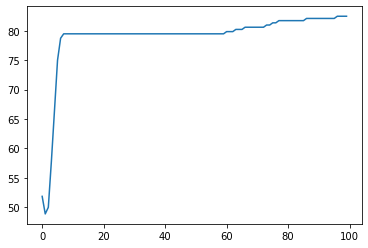

In [4]:
# TODO: Train for 100 epochs, on all instances.
nn = Neural_Network(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,
                        learning_rate)
nn.train(instances, labels, 100, False)
print('\nAfter training:')
print('Hidden layer weights:\n', nn.hidden_layer_weights)
print('Output layer weights:\n', nn.output_layer_weights)

In [5]:
pd_data_ts = pd.read_csv('penguins307-test.csv')
test_labels = pd_data_ts.iloc[:, -1]
test_instances = pd_data_ts.iloc[:, :-1]
#scale the test according to our training data.
# TODO: Compute and print the test accuracy
test_instances = scaler.transform(test_instances)
label_encoder, integer_encoded, onehot_encoder, onehot_encoded = encode_labels(test_labels)
test_labels = onehot_encoded
acc= 0
predictions = nn.predict(test_instances) # using the same model as before
acc = sum(predictions == np.argmax(test_labels, axis=1)) / len(test_labels) * 100
print('Test Accuracy is: ', acc)

Test Accuracy is:  81.53846153846153


In [6]:
n_in = 4
n_hidden = 2
n_out = 3
learning_rate = 0.2
biases = np.array([-0.02, -0.20, -0.33, 0.26, 0.06])
initial_hidden_layer_weights = np.array([[-0.28, -0.22], [0.08, 0.20], [-0.30, 0.32], [0.10, 0.01]])
initial_output_layer_weights = np.array([[-0.29, 0.03, 0.21], [0.08, 0.13, -0.36]])

nnBias = Neural_Network_Biases(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,biases,learning_rate)

epoch =  1
Hidden layer weights 
 [[-0.27424401 -0.30975817]
 [ 0.07886907  0.35534647]
 [-0.21717106  0.19378445]
 [ 0.18085654 -0.09354912]]
Output layer weights  
 [[-0.686051   -0.05057703 -0.08993949]
 [-0.3191158  -0.07758915 -0.59407451]]
acc =  63.80597014925373
epoch =  2
Hidden layer weights 
 [[-0.2919343  -0.44954794]
 [ 0.03185717  0.45405342]
 [-0.16738898  0.01363656]
 [ 0.22550142 -0.25048074]]
Output layer weights  
 [[-0.70015145 -0.05600694 -0.1324111 ]
 [-0.17746763 -0.20749341 -0.64301087]]
acc =  58.582089552238806
epoch =  3
Hidden layer weights 
 [[-0.30677984 -0.62942786]
 [-0.01518767  0.58195072]
 [-0.11690703 -0.22270994]
 [ 0.27012526 -0.45346665]]
Output layer weights  
 [[-0.72786834 -0.05301172 -0.14080178]
 [ 0.09591783 -0.36254461 -0.75081319]]
acc =  59.32835820895522
epoch =  4
Hidden layer weights 
 [[-0.31043461 -0.8381091 ]
 [-0.07047278  0.78130671]
 [-0.05138551 -0.50692626]
 [ 0.32726633 -0.6911561 ]]
Output layer weights  
 [[-0.78371078 -0.04

 [[-0.64991552 -7.11453675]
 [-4.98215955  4.25293876]
 [ 2.86170403 -2.47376876]
 [ 3.08687187 -0.29227778]]
Output layer weights  
 [[-3.01176935 -4.14673196  4.97951165]
 [ 6.72447171 -4.46954199 -5.88564113]]
acc =  97.76119402985076
epoch =  37
Hidden layer weights 
 [[-0.67618541 -7.2602034 ]
 [-5.04236216  4.27732266]
 [ 2.91500215 -2.43711219]
 [ 3.14743416 -0.19268663]]
Output layer weights  
 [[-3.00191196 -4.27266618  5.06927113]
 [ 6.79796478 -4.60403221 -5.88980924]]
acc =  97.76119402985076
epoch =  38
Hidden layer weights 
 [[-0.70112097 -7.3999156 ]
 [-5.09819991  4.30164216]
 [ 2.96521465 -2.39970578]
 [ 3.20454485 -0.09493545]]
Output layer weights  
 [[-2.99171469 -4.39123632  5.15462255]
 [ 6.8693826  -4.73238831 -5.89298271]]
acc =  97.76119402985076
epoch =  39
Hidden layer weights 
 [[-7.24836189e-01 -7.53393457e+00]
 [-5.15011222e+00  4.32586234e+00]
 [ 3.01261019e+00 -2.36174781e+00]
 [ 3.25849054e+00  7.86888905e-04]]
Output layer weights  
 [[-2.98126596 -4.5

acc =  98.50746268656717
epoch =  68
Hidden layer weights 
 [[-1.14939264 -9.90981512]
 [-5.88095712  4.90409293]
 [ 3.79466918 -1.39696713]
 [ 4.15387327  1.81336217]]
Output layer weights  
 [[-2.72174571 -6.24029269  6.69384719]
 [ 8.36868562 -7.02189289 -5.76673275]]
acc =  98.88059701492537
epoch =  69
Hidden layer weights 
 [[-1.15950787 -9.96160926]
 [-5.89420097  4.92008687]
 [ 3.81156414 -1.37232432]
 [ 4.17365679  1.8490468 ]]
Output layer weights  
 [[-2.7166368  -6.2741333   6.72793837]
 [ 8.40413045 -7.06984755 -5.75859547]]
acc =  98.88059701492537
epoch =  70
Hidden layer weights 
 [[ -1.16946212 -10.01226048]
 [ -5.90709707   4.93592831]
 [  3.82810177  -1.34826541]
 [  4.19306908   1.88347128]]
Output layer weights  
 [[-2.71186479 -6.30710674  6.76141632]
 [ 8.43892627 -7.11676905 -5.750339  ]]
acc =  98.88059701492537
epoch =  71
Hidden layer weights 
 [[ -1.17926116 -10.06181594]
 [ -5.91966525   4.95162664]
 [  3.84429569  -1.32478081]
 [  4.21212571   1.91668017]]


After training:
Hidden layer weights:
 [[ -1.41125149 -11.1677124 ]
 [ -6.19617455   5.36653832]
 [  4.20370122  -0.83573521]
 [  4.65334522   2.51533604]]
Output layer weights:
 [[-2.71575124 -7.03671998  7.55122265]
 [ 9.25098687 -8.18272794 -5.48420327]]


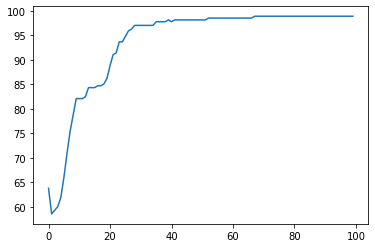

In [7]:
nnBias.train(instances, labels, 100, False)
print('\nAfter training:')
print('Hidden layer weights:\n', nnBias.hidden_layer_weights)
print('Output layer weights:\n', nnBias.output_layer_weights)

In [8]:
predictions = nnBias.predict(test_instances) # using the same model as before
acc = sum(predictions == np.argmax(test_labels, axis=1)) / len(test_labels) * 100
print('Test Accuracy is: ', acc)

Test Accuracy is:  100.0


In [9]:
nnBiasLr2 =  Neural_Network_Biases(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,biases,0.02)

epoch =  1
Hidden layer weights 
 [[ -1.41004159 -11.13818599]
 [ -6.19439549   5.42012924]
 [  4.20595597  -0.80626375]
 [  4.65531021   2.54590398]]
Output layer weights  
 [[-2.7131913  -7.04158574  7.5519683 ]
 [ 9.26397758 -8.19622771 -5.48423837]]
acc =  98.50746268656717
epoch =  2
Hidden layer weights 
 [[ -1.40965798 -11.12266779]
 [ -6.19384777   5.45006602]
 [  4.2074576   -0.78800069]
 [  4.65669212   2.56485172]]
Output layer weights  
 [[-2.71135476 -7.04556186  7.55288142]
 [ 9.27257155 -8.20507429 -5.48419309]]
acc =  98.88059701492537
epoch =  3
Hidden layer weights 
 [[ -1.40973238 -11.11482825]
 [ -6.19396389   5.46756588]
 [  4.20854481  -0.77584797]
 [  4.6577762    2.57762218]]
Output layer weights  
 [[-2.70992044 -7.04904008  7.55391586]
 [ 9.27883717 -8.2114367  -5.48408625]]
acc =  98.50746268656717
epoch =  4
Hidden layer weights 
 [[ -1.41007198 -11.11152848]
 [ -6.19445946   5.47789761]
 [  4.20939655  -0.76731702]
 [  4.65869719   2.58679448]]
Output layer

acc =  98.88059701492537
epoch =  31
Hidden layer weights 
 [[ -1.42680259 -11.2089726 ]
 [ -6.21906307   5.46864236]
 [  4.22611761  -0.69204425]
 [  4.68022578   2.68206982]]
Output layer weights  
 [[-2.68895175 -7.12362741  7.59119021]
 [ 9.35957669 -8.29381778 -5.47647846]]
acc =  98.88059701492537
epoch =  32
Hidden layer weights 
 [[ -1.4273654  -11.21296955]
 [ -6.21990048   5.46766887]
 [  4.22678822  -0.68978864]
 [  4.68108442   2.68503919]]
Output layer weights  
 [[-2.68832389 -7.12613022  7.59260328]
 [ 9.36215836 -8.29658207 -5.47615402]]
acc =  98.88059701492537
epoch =  33
Hidden layer weights 
 [[ -1.42792491 -11.21696046]
 [ -6.22073285   5.46670175]
 [  4.22746143  -0.68754348]
 [  4.68194608   2.68799566]]
Output layer weights  
 [[-2.6877012  -7.12862463  7.59401995]
 [ 9.36473506 -8.29934692 -5.47582693]]
acc =  98.88059701492537
epoch =  34
Hidden layer weights 
 [[ -1.42848129 -11.22094532]
 [ -6.22156039   5.46574101]
 [  4.22813705  -0.68530872]
 [  4.6828106

 [[ -1.44377028 -11.33388041]
 [ -6.24404693   5.44064203]
 [  4.24825699  -0.62479305]
 [  4.70864022   2.77107049]]
Output layer weights  
 [[-2.67131764 -7.1996999   7.63786726]
 [ 9.44006707 -8.3820911  -5.46491532]]
acc =  98.88059701492537
epoch =  64
Hidden layer weights 
 [[ -1.44427991 -11.33768489]
 [ -6.24478408   5.43987053]
 [  4.24895703  -0.62284697]
 [  4.70954577   2.77366318]]
Output layer weights  
 [[-2.67084588 -7.20195081  7.63936468]
 [ 9.44251954 -8.38483264 -5.46451891]]
acc =  98.88059701492537
epoch =  65
Hidden layer weights 
 [[ -1.44478886 -11.34148346]
 [ -6.24551931   5.43910518]
 [  4.24965697  -0.6209098 ]
 [  4.7104518    2.77624512]]
Output layer weights  
 [[-2.67037883 -7.20419461  7.64086392]
 [ 9.4449685  -8.38757271 -5.46412062]]
acc =  98.88059701492537
epoch =  66
Hidden layer weights 
 [[ -1.44529717 -11.34527611]
 [ -6.24625267   5.43834596]
 [  4.25035679  -0.61898152]
 [  4.71135829   2.77881635]]
Output layer weights  
 [[-2.66991647 -7.2

 [[ -1.45885512 -11.4454756 ]
 [ -6.26546081   5.42011326]
 [  4.2691173   -0.57012164]
 [  4.73591645   2.84437773]]
Output layer weights  
 [[-2.65918903 -7.26432958  7.68343348]
 [ 9.51215718 -8.46361429 -5.45227216]]
acc =  98.88059701492537
epoch =  94
Hidden layer weights 
 [[ -1.45935313 -11.44910639]
 [ -6.26615367   5.4195199 ]
 [  4.2698049   -0.56842523]
 [  4.73682656   2.84666944]]
Output layer weights  
 [[-2.65885605 -7.26638791  7.68497021]
 [ 9.5145086  -8.46630359 -5.45182645]]
acc =  98.88059701492537
epoch =  95
Hidden layer weights 
 [[ -1.45985094 -11.45273153]
 [ -6.26684538   5.41893224]
 [  4.27049186  -0.56673653]
 [  4.73773657   2.84895187]]
Output layer weights  
 [[-2.65852761 -7.26844053  7.68650779]
 [ 9.51685677 -8.46899095 -5.45137934]]
acc =  98.88059701492537
epoch =  96
Hidden layer weights 
 [[ -1.46034856 -11.45635103]
 [ -6.26753598   5.41835027]
 [  4.27117819  -0.5650555 ]
 [  4.73864647   2.85122503]]
Output layer weights  
 [[-2.65820371 -7.2

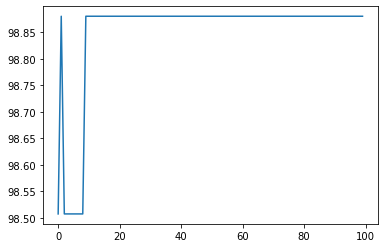

In [10]:
nnBiasLr2.train(instances, labels, 100, False)
print('\nAfter training:')
print('Hidden layer weights:\n', nnBias.hidden_layer_weights)
print('Output layer weights:\n', nnBias.output_layer_weights)

In [11]:
predictions = nnBiasLr2.predict(test_instances) # using the same model as before
acc = sum(predictions == np.argmax(test_labels, axis=1)) / len(test_labels) * 100
print('Test Accuracy is: ', acc)

Test Accuracy is:  100.0


In [12]:
nnBiasLr3 =  Neural_Network_Biases(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,biases,0.1)

epoch =  1
Hidden layer weights 
 [[ -1.46580413 -11.52294428]
 [ -6.27508453   5.36269155]
 [  4.27795428  -0.58389615]
 [  4.74791288   2.83464096]]
Output layer weights  
 [[-2.66200811 -7.28522109  7.70512803]
 [ 9.52762977 -8.48491558 -5.44447417]]
acc =  99.25373134328358
epoch =  2
Hidden layer weights 
 [[ -1.46827582 -11.54270161]
 [ -6.27817044   5.35901274]
 [  4.28229665  -0.58211394]
 [  4.75360676   2.83683922]]
Output layer weights  
 [[-2.66411346 -7.29334141  7.71486869]
 [ 9.53635214 -8.49698398 -5.44060509]]
acc =  98.88059701492537
epoch =  3
Hidden layer weights 
 [[ -1.47071578 -11.55838901]
 [ -6.28113003   5.36163016]
 [  4.28654996  -0.57708492]
 [  4.75919283   2.84242611]]
Output layer weights  
 [[-2.66591016 -7.30157187  7.72438143]
 [ 9.5462736  -8.51014904 -5.43684968]]
acc =  98.88059701492537
epoch =  4
Hidden layer weights 
 [[ -1.47323045 -11.57350626]
 [ -6.28415612   5.36500416]
 [  4.29067016  -0.57170909]
 [  4.7646564    2.84836416]]
Output layer

 [[ -1.54468041 -11.94497965]
 [ -6.36985318   5.46615961]
 [  4.3830776   -0.44222787]
 [  4.89523512   2.98705363]]
Output layer weights  
 [[-2.73604967 -7.51239471  7.96283754]
 [ 9.80604044 -8.84722969 -5.33827244]]
acc =  98.88059701492537
epoch =  32
Hidden layer weights 
 [[ -1.54718455 -11.95761674]
 [ -6.37291565   5.47010474]
 [  4.3861443   -0.43799423]
 [  4.89974767   2.99145095]]
Output layer weights  
 [[-2.73924354 -7.51937069  7.97061623]
 [ 9.81452474 -8.85825997 -5.33490371]]
acc =  98.88059701492537
epoch =  33
Hidden layer weights 
 [[ -1.54967492 -11.97018415]
 [ -6.37596747   5.47405885]
 [  4.38919226  -0.43379305]
 [  4.90424296   2.995807  ]]
Output layer weights  
 [[-2.74247713 -7.52631386  7.9783521 ]
 [ 9.82296136 -8.86922845 -5.3315442 ]]
acc =  98.88059701492537
epoch =  34
Hidden layer weights 
 [[ -1.55215154 -11.9826828 ]
 [ -6.3790087    5.47802149]
 [  4.39222172  -0.42962361]
 [  4.9087212    3.00012283]]
Output layer weights  
 [[-2.74574972 -7.5

 [[ -1.61616328 -12.30798146]
 [ -6.46023396   5.59083477]
 [  4.47025633  -0.32346199]
 [  5.02784512   3.10823158]]
Output layer weights  
 [[-2.85077829 -7.71489538  8.18604029]
 [10.04919767 -9.16318834 -5.23799114]]
acc =  98.88059701492537
epoch =  63
Hidden layer weights 
 [[ -1.61827119 -12.31882021]
 [ -6.46300878   5.59488231]
 [  4.4728211   -0.31998356]
 [  5.03189487   3.11174257]]
Output layer weights  
 [[-2.8549346  -7.72100213  8.19268602]
 [10.05643063 -9.17258064 -5.23489369]]
acc =  98.88059701492537
epoch =  64
Hidden layer weights 
 [[ -1.62036773 -12.32961138]
 [ -6.46577587   5.59892839]
 [  4.47537174  -0.31652323]
 [  5.03593168   3.11523527]]
Output layer weights  
 [[-2.85911465 -7.72708501  8.19930075]
 [10.06362954 -9.18192862 -5.23180443]]
acc =  98.88059701492537
epoch =  65
Hidden layer weights 
 [[ -1.622453   -12.34035551]
 [ -6.46853532   5.60297278]
 [  4.47790836  -0.31308073]
 [  5.03995564   3.11871018]]
Output layer weights  
 [[-2.86331807 -7.7

 [[ -1.68020291 -12.64315676]
 [ -6.54817077   5.72260879]
 [  4.54799514  -0.21702712]
 [  5.15520067   3.21661346]]
Output layer weights  
 [[-2.99881261 -7.90486283  8.3904361 ]
 [10.27148203 -9.45199467 -5.13987261]]
acc =  98.88059701492537
epoch =  96
Hidden layer weights 
 [[ -1.68198112 -12.65266848]
 [ -6.55073243   5.7265155 ]
 [  4.55014683  -0.21403742]
 [  5.15887544   3.21971857]]
Output layer weights  
 [[-3.00360046 -7.91027924  8.39619482]
 [10.27773808 -9.46013509 -5.13702324]]
acc =  98.88059701492537
epoch =  97
Hidden layer weights 
 [[ -1.68375067 -12.66214661]
 [ -6.5532888    5.73041571]
 [  4.55228759  -0.21105992]
 [  5.16254041   3.22281628]]
Output layer weights  
 [[-3.00840353 -7.9156774   8.40193049]
 [10.28396858 -9.46824341 -5.13418065]]
acc =  98.88059701492537
epoch =  98
Hidden layer weights 
 [[ -1.68551162 -12.67159146]
 [ -6.55583993   5.73430932]
 [  4.5544175   -0.20809449]
 [  5.16619565   3.22590683]]
Output layer weights  
 [[-3.01322166 -7.9

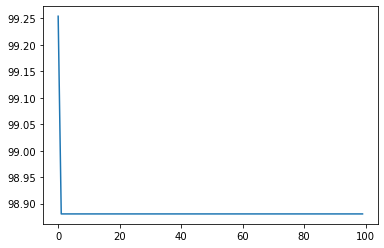

In [13]:
nnBiasLr3.train(instances, labels, 100, False)
print('\nAfter training:')
print('Hidden layer weights:\n', nnBias.hidden_layer_weights)
print('Output layer weights:\n', nnBias.output_layer_weights)

In [14]:
predictions = nnBiasLr3.predict(test_instances) # using the same model as before
acc = sum(predictions == np.argmax(test_labels, axis=1)) / len(test_labels) * 100
print('Test Accuracy is: ', acc)

Test Accuracy is:  100.0


In [15]:
nnBiasLr4 =  Neural_Network_Biases(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,biases,0.5)

epoch =  1
Hidden layer weights 
 [[ -1.6866788  -12.79593594]
 [ -6.55655193   5.65695629]
 [  4.59566462  -0.30459276]
 [  5.21417216   3.09999007]]
Output layer weights  
 [[-3.09349301 -7.94618432  8.46684578]
 [10.25813783 -9.50045876 -5.089864  ]]
acc =  98.50746268656717
epoch =  2
Hidden layer weights 
 [[ -1.69214773 -12.80198742]
 [ -6.56034331   5.74103022]
 [  4.62066247  -0.35044487]
 [  5.24457812   3.05430446]]
Output layer weights  
 [[-3.15727754 -7.96083727  8.50690808]
 [10.24515822 -9.52584534 -5.06041388]]
acc =  98.50746268656717
epoch =  3
Hidden layer weights 
 [[ -1.70122071 -12.80878452]
 [ -6.56878856   5.82176364]
 [  4.64018427  -0.38659736]
 [  5.27000824   3.01583025]]
Output layer weights  
 [[-3.21763214 -7.97529499  8.54316606]
 [10.2369779  -9.54718252 -5.0340445 ]]
acc =  98.88059701492537
epoch =  4
Hidden layer weights 
 [[ -1.71150078 -12.81684525]
 [ -6.57923548   5.89881178]
 [  4.65702744  -0.41526926]
 [  5.29298899   2.98283022]]
Output layer

 [[ -1.92603823 -13.68043719]
 [ -6.91823599   7.36553115]
 [  4.99752199  -0.19692562]
 [  5.82469416   3.04197892]]
Output layer weights  
 [[ -4.46246148  -8.59876263   9.301636  ]
 [ 10.6349406  -10.14982506  -4.51111803]]
acc =  98.88059701492537
epoch =  40
Hidden layer weights 
 [[ -1.9300623  -13.71276336]
 [ -6.92653961   7.39059149]
 [  5.00426463  -0.18671632]
 [  5.83605072   3.05422727]]
Output layer weights  
 [[ -4.48795374  -8.61424578   9.31628169]
 [ 10.6494637  -10.16694244  -4.50095004]]
acc =  98.88059701492537
epoch =  41
Hidden layer weights 
 [[ -1.93403256 -13.74518799]
 [ -6.93479245   7.41521072]
 [  5.01092044  -0.17662314]
 [  5.84728296   3.06663021]]
Output layer weights  
 [[ -4.51327353  -8.6295759    9.33072893]
 [ 10.66392072 -10.18399429  -4.49090488]]
acc =  98.88059701492537
epoch =  42
Hidden layer weights 
 [[ -1.93795073 -13.77769773]
 [ -6.94299545   7.43940711]
 [  5.0174926   -0.16664268]
 [  5.8583947    3.07917831]]
Output layer weights  
 

 [[ -2.05704592 -14.97539367]
 [ -7.2182336    8.14028871]
 [  5.22006281   0.15174835]
 [  6.20675533   3.59040123]]
Output layer weights  
 [[ -5.3865176   -9.12071336   9.77196033]
 [ 11.14012079 -10.76607809  -4.17536621]]
acc =  98.88059701492537
epoch =  80
Hidden layer weights 
 [[ -2.05976435 -15.00680913]
 [ -7.22504327   8.15569498]
 [  5.22474808   0.1595432 ]
 [  6.21484692   3.60449025]]
Output layer weights  
 [[ -5.40765771  -9.13172656   9.78145176]
 [ 11.15067949 -10.77962227  -4.16836469]]
acc =  98.88059701492537
epoch =  81
Hidden layer weights 
 [[ -2.06246341 -15.03815949]
 [ -7.23182457   8.17097199]
 [  5.22940202   0.16731581]
 [  6.22288139   3.61855822]]
Output layer weights  
 [[ -5.428714    -9.14266205   9.79085996]
 [ 11.16114969 -10.79308417  -4.16141485]]
acc =  98.88059701492537
epoch =  82
Hidden layer weights 
 [[ -2.06514343 -15.06944471]
 [ -7.23857772   8.18612261]
 [  5.23402515   0.17506719]
 [  6.23085937   3.63260337]]
Output layer weights  
 

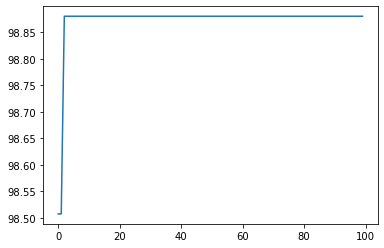

In [16]:
nnBiasLr4.train(instances, labels, 100, False)
print('\nAfter training:')
print('Hidden layer weights:\n', nnBias.hidden_layer_weights)
print('Output layer weights:\n', nnBias.output_layer_weights)

In [17]:
predictions = nnBiasLr4.predict(test_instances) # using the same model as before
acc = sum(predictions == np.argmax(test_labels, axis=1)) / len(test_labels) * 100
print('Test Accuracy is: ', acc)

Test Accuracy is:  96.92307692307692


In [18]:
nnBiasLr5 =  Neural_Network_Biases(n_in, n_hidden, n_out, initial_hidden_layer_weights, initial_output_layer_weights,biases,0.001)

epoch =  1
Hidden layer weights 
 [[ -2.1104095  -15.61863248]
 [ -7.35546726   8.44503835]
 [  5.31251082   0.31428088]
 [  6.36543138   3.88233264]]
Output layer weights  
 [[ -5.81292586  -9.33720911   9.95538337]
 [ 11.34602245 -11.03532708  -4.03830286]]
acc =  96.64179104477611
epoch =  2
Hidden layer weights 
 [[ -2.11037416 -15.61569911]
 [ -7.35542561   8.44992714]
 [  5.31256148   0.3166395 ]
 [  6.36542379   3.88475737]]
Output layer weights  
 [[ -5.81282772  -9.33731636   9.95538439]
 [ 11.34688274 -11.03608038  -4.03830413]]
acc =  96.64179104477611
epoch =  3
Hidden layer weights 
 [[ -2.11034026 -15.6128129 ]
 [ -7.35538583   8.45472599]
 [  5.31261036   0.3189575 ]
 [  6.36541576   3.88714454]]
Output layer weights  
 [[ -5.81273079  -9.33742227   9.95538546]
 [ 11.3477303  -11.03682177  -4.03830536]]
acc =  96.64179104477611
epoch =  4
Hidden layer weights 
 [[ -2.11030784 -15.6099734 ]
 [ -7.355348     8.45943642]
 [  5.31265737   0.32123554]
 [  6.36540727   3.88949

 [[ -2.1102416  -15.53911726]
 [ -7.35546785   8.57424046]
 [  5.31286709   0.37794966]
 [  6.36469973   3.94977546]]
Output layer weights  
 [[ -5.8099836   -9.34033037   9.95545718]
 [ 11.37074583 -11.05600735  -4.03832481]]
acc =  98.50746268656717
epoch =  39
Hidden layer weights 
 [[ -2.1102689  -15.53772159]
 [ -7.35551153   8.57646755]
 [  5.31283446   0.3790851 ]
 [  6.36466463   3.95103435]]
Output layer weights  
 [[ -5.80991972  -9.34039391   9.95546018]
 [ 11.37124363 -11.05638469  -4.03832468]]
acc =  98.50746268656717
epoch =  40
Hidden layer weights 
 [[ -2.11029756 -15.53636017]
 [ -7.35555707   8.57863982]
 [  5.31280009   0.38019465]
 [  6.36462878   3.95226797]]
Output layer weights  
 [[ -5.80985647  -9.3404566    9.95546324]
 [ 11.37173408 -11.05675407  -4.03832452]]
acc =  98.50746268656717
epoch =  41
Hidden layer weights 
 [[ -2.11032755 -15.53503249]
 [ -7.35560443   8.58075824]
 [  5.31276404   0.38127874]
 [  6.36459219   3.95347671]]
Output layer weights  
 

Hidden layer weights 
 [[ -2.11202134 -15.50533455]
 [ -7.35815404   8.62870754]
 [  5.31070939   0.40660671]
 [  6.36293251   3.98365617]]
Output layer weights  
 [[ -5.80786585  -9.34234185   9.9556063 ]
 [ 11.38576644 -11.06604769  -4.03829635]]
acc =  99.6268656716418
epoch =  78
Hidden layer weights 
 [[ -2.11207948 -15.5048998 ]
 [ -7.35824007   8.62943948]
 [  5.31063922   0.40701292]
 [  6.36288036   3.98420667]]
Output layer weights  
 [[ -5.80781955  -9.34238449   9.95561085]
 [ 11.38605976 -11.06621005  -4.03829507]]
acc =  99.6268656716418
epoch =  79
Hidden layer weights 
 [[ -2.11213797 -15.50448081]
 [ -7.35832659   8.63014757]
 [  5.31056865   0.407407  ]
 [  6.36282804   3.98474551]]
Output layer weights  
 [[ -5.80777354  -9.34242682   9.95561542]
 [ 11.3863497  -11.06636904  -4.03829378]]
acc =  99.6268656716418
epoch =  80
Hidden layer weights 
 [[ -2.11219681 -15.50407722]
 [ -7.35841358   8.63083235]
 [  5.3104977    0.40778924]
 [  6.36277555   3.98527296]]
Outpu

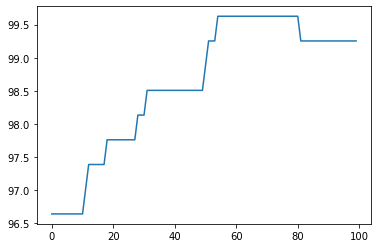

In [19]:
nnBiasLr5.train(instances, labels, 100, False)
print('\nAfter training:')
print('Hidden layer weights:\n', nnBias.hidden_layer_weights)
print('Output layer weights:\n', nnBias.output_layer_weights)

In [20]:
predictions = nnBiasLr5.predict(test_instances) # using the same model as before
acc = sum(predictions == np.argmax(test_labels, axis=1)) / len(test_labels) * 100
print('Test Accuracy is: ', acc)

Test Accuracy is:  98.46153846153847
